In [1]:
%matplotlib inline
import os
import time
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.lines as mlines
from sklearn.utils import shuffle
from scipy.stats import ortho_group
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from xnn.sosxnn import SOSxNN

In [2]:
# Simulation
corr = 0.5
noise_sigma = 1
dummy_num = 0
feature_num = 10
test_num = 10000
data_num = 10000

proj_matrix = np.zeros((feature_num,4))
proj_matrix[:7, 0] = np.array([1,0,0,0,0,0,0])
proj_matrix[:7, 1] = np.array([0,1,0,0,0,0,0])
proj_matrix[:7, 2] = np.array([0,0,0.5,0.5,0,0,0])
proj_matrix[:7, 3] = np.array([0,0,0,0,0.2,0.3,0.5])

def data_generator1(data_num, feature_num, corr, proj_matrix, noise_sigma):
    u = np.random.uniform(-1,1, [data_num, 1])
    t= np.sqrt(corr/(1-corr))
    X = np.zeros((data_num, feature_num))
    for i in range(feature_num):
        X[:, i:i+1] = (np.random.uniform(-1,1,[data_num,1])+t*u)/(1+t)
    Y = np.reshape(2*np.dot(X, proj_matrix[:,0])+0.2*np.exp(-4*np.dot(X, proj_matrix[:,1])) + \
              3*(np.dot(X, proj_matrix[:,2]))**2+2.5*np.sin(np.pi*np.dot(X, proj_matrix[:,3])), [-1,1]) + \
              noise_sigma*np.random.normal(0,1, [data_num,1])
    return X, Y

np.random.seed(0)
X, Y = data_generator1(data_num+test_num, feature_num+dummy_num, corr, proj_matrix, noise_sigma)
scaler_x = MinMaxScaler((-1, 1)); scaler_y = MinMaxScaler((-1, 1))
sX = scaler_x.fit_transform(X); sY = scaler_y.fit_transform(Y)
train_x, test_x, train_y, test_y = train_test_split(sX, sY, test_size = test_num)

Initial training.
Training epoch: 1, train loss: 0.06195, val loss: 0.06164
Training epoch: 2, train loss: 0.05207, val loss: 0.05043
Training epoch: 3, train loss: 0.04411, val loss: 0.04369
Training epoch: 4, train loss: 0.03922, val loss: 0.03843
Training epoch: 5, train loss: 0.03542, val loss: 0.03502
Training epoch: 6, train loss: 0.03252, val loss: 0.03197
Training epoch: 7, train loss: 0.02998, val loss: 0.02948
Training epoch: 8, train loss: 0.02831, val loss: 0.02788
Training epoch: 9, train loss: 0.02779, val loss: 0.02741
Training epoch: 10, train loss: 0.02700, val loss: 0.02672
Training epoch: 11, train loss: 0.03081, val loss: 0.03048
Training epoch: 12, train loss: 0.02381, val loss: 0.02370
Training epoch: 13, train loss: 0.02322, val loss: 0.02349
Training epoch: 14, train loss: 0.02220, val loss: 0.02220
Training epoch: 15, train loss: 0.02177, val loss: 0.02193
Training epoch: 16, train loss: 0.02174, val loss: 0.02180
Training epoch: 17, train loss: 0.02135, val lo

Training epoch: 141, train loss: 0.01713, val loss: 0.01723
Training epoch: 142, train loss: 0.01720, val loss: 0.01722
Training epoch: 143, train loss: 0.01705, val loss: 0.01721
Training epoch: 144, train loss: 0.01747, val loss: 0.01759
Training epoch: 145, train loss: 0.02019, val loss: 0.02049
Training epoch: 146, train loss: 0.01721, val loss: 0.01731
Training epoch: 147, train loss: 0.01753, val loss: 0.01758
Training epoch: 148, train loss: 0.01771, val loss: 0.01781
Training epoch: 149, train loss: 0.01710, val loss: 0.01709
Training epoch: 150, train loss: 0.01842, val loss: 0.01859
Training epoch: 151, train loss: 0.01752, val loss: 0.01743
Training epoch: 152, train loss: 0.01727, val loss: 0.01723
Training epoch: 153, train loss: 0.01703, val loss: 0.01700
Training epoch: 154, train loss: 0.01810, val loss: 0.01824
Training epoch: 155, train loss: 0.01816, val loss: 0.01812
Training epoch: 156, train loss: 0.01823, val loss: 0.01838
Training epoch: 157, train loss: 0.01730

Training epoch: 278, train loss: 0.01659, val loss: 0.01655
Training epoch: 279, train loss: 0.01771, val loss: 0.01777
Training epoch: 280, train loss: 0.01691, val loss: 0.01695
Training epoch: 281, train loss: 0.01698, val loss: 0.01682
Training epoch: 282, train loss: 0.01678, val loss: 0.01688
Training epoch: 283, train loss: 0.01651, val loss: 0.01646
Training epoch: 284, train loss: 0.01651, val loss: 0.01660
Training epoch: 285, train loss: 0.01788, val loss: 0.01783
Training epoch: 286, train loss: 0.01710, val loss: 0.01698
Training epoch: 287, train loss: 0.01773, val loss: 0.01766
Training epoch: 288, train loss: 0.01724, val loss: 0.01704
Training epoch: 289, train loss: 0.01661, val loss: 0.01677
Training epoch: 290, train loss: 0.01694, val loss: 0.01692
Training epoch: 291, train loss: 0.01738, val loss: 0.01734
Training epoch: 292, train loss: 0.01667, val loss: 0.01688
Training epoch: 293, train loss: 0.01709, val loss: 0.01710
Training epoch: 294, train loss: 0.01653

Training epoch: 416, train loss: 0.01673, val loss: 0.01694
Training epoch: 417, train loss: 0.01682, val loss: 0.01711
Training epoch: 418, train loss: 0.01654, val loss: 0.01670
Training epoch: 419, train loss: 0.01658, val loss: 0.01662
Training epoch: 420, train loss: 0.01632, val loss: 0.01654
Training epoch: 421, train loss: 0.01680, val loss: 0.01694
Training epoch: 422, train loss: 0.01651, val loss: 0.01664
Training epoch: 423, train loss: 0.01670, val loss: 0.01697
Training epoch: 424, train loss: 0.01865, val loss: 0.01874
Training epoch: 425, train loss: 0.01721, val loss: 0.01743
Training epoch: 426, train loss: 0.01694, val loss: 0.01736
Training epoch: 427, train loss: 0.01704, val loss: 0.01716
Training epoch: 428, train loss: 0.01662, val loss: 0.01678
Training epoch: 429, train loss: 0.01660, val loss: 0.01675
Training epoch: 430, train loss: 0.01654, val loss: 0.01685
Training epoch: 431, train loss: 0.01661, val loss: 0.01676
Training epoch: 432, train loss: 0.01680

Training epoch: 553, train loss: 0.01660, val loss: 0.01676
Training epoch: 554, train loss: 0.01742, val loss: 0.01771
Training epoch: 555, train loss: 0.01625, val loss: 0.01650
Training epoch: 556, train loss: 0.01641, val loss: 0.01660
Training epoch: 557, train loss: 0.01636, val loss: 0.01655
Training epoch: 558, train loss: 0.01726, val loss: 0.01745
Training epoch: 559, train loss: 0.01820, val loss: 0.01827
Training epoch: 560, train loss: 0.01704, val loss: 0.01732
Training epoch: 561, train loss: 0.01649, val loss: 0.01667
Training epoch: 562, train loss: 0.01761, val loss: 0.01772
Training epoch: 563, train loss: 0.01692, val loss: 0.01714
Training epoch: 564, train loss: 0.01717, val loss: 0.01750
Training epoch: 565, train loss: 0.01619, val loss: 0.01637
Training epoch: 566, train loss: 0.01689, val loss: 0.01720
Training epoch: 567, train loss: 0.01620, val loss: 0.01638
Training epoch: 568, train loss: 0.01631, val loss: 0.01647
Training epoch: 569, train loss: 0.01645

Training epoch: 690, train loss: 0.01633, val loss: 0.01656
Training epoch: 691, train loss: 0.01731, val loss: 0.01762
Training epoch: 692, train loss: 0.01638, val loss: 0.01658
Training epoch: 693, train loss: 0.01620, val loss: 0.01648
Training epoch: 694, train loss: 0.01644, val loss: 0.01664
Training epoch: 695, train loss: 0.01607, val loss: 0.01628
Training epoch: 696, train loss: 0.01618, val loss: 0.01635
Training epoch: 697, train loss: 0.01613, val loss: 0.01643
Training epoch: 698, train loss: 0.01660, val loss: 0.01685
Training epoch: 699, train loss: 0.01670, val loss: 0.01703
Training epoch: 700, train loss: 0.01618, val loss: 0.01635
Training epoch: 701, train loss: 0.01674, val loss: 0.01689
Training epoch: 702, train loss: 0.01625, val loss: 0.01660
Training epoch: 703, train loss: 0.01622, val loss: 0.01637
Training epoch: 704, train loss: 0.01609, val loss: 0.01621
Training epoch: 705, train loss: 0.01643, val loss: 0.01664
Training epoch: 706, train loss: 0.01629

Training epoch: 827, train loss: 0.01606, val loss: 0.01632
Training epoch: 828, train loss: 0.01626, val loss: 0.01649
Training epoch: 829, train loss: 0.01634, val loss: 0.01647
Training epoch: 830, train loss: 0.01602, val loss: 0.01623
Training epoch: 831, train loss: 0.01612, val loss: 0.01636
Training epoch: 832, train loss: 0.01619, val loss: 0.01643
Training epoch: 833, train loss: 0.01628, val loss: 0.01647
Training epoch: 834, train loss: 0.01636, val loss: 0.01662
Training epoch: 835, train loss: 0.01776, val loss: 0.01821
Training epoch: 836, train loss: 0.01698, val loss: 0.01718
Training epoch: 837, train loss: 0.01622, val loss: 0.01641
Training epoch: 838, train loss: 0.01664, val loss: 0.01686
Training epoch: 839, train loss: 0.01626, val loss: 0.01641
Training epoch: 840, train loss: 0.01608, val loss: 0.01634
Training epoch: 841, train loss: 0.01675, val loss: 0.01699
Training epoch: 842, train loss: 0.01671, val loss: 0.01690
Training epoch: 843, train loss: 0.01626

Training epoch: 964, train loss: 0.01678, val loss: 0.01702
Training epoch: 965, train loss: 0.01615, val loss: 0.01646
Training epoch: 966, train loss: 0.01618, val loss: 0.01634
Training epoch: 967, train loss: 0.01709, val loss: 0.01751
Training epoch: 968, train loss: 0.01617, val loss: 0.01641
Training epoch: 969, train loss: 0.01633, val loss: 0.01658
Training epoch: 970, train loss: 0.01638, val loss: 0.01658
Training epoch: 971, train loss: 0.01615, val loss: 0.01641
Training epoch: 972, train loss: 0.01656, val loss: 0.01693
Training epoch: 973, train loss: 0.01609, val loss: 0.01628
Training epoch: 974, train loss: 0.01646, val loss: 0.01672
Training epoch: 975, train loss: 0.01657, val loss: 0.01665
Training epoch: 976, train loss: 0.01695, val loss: 0.01734
Training epoch: 977, train loss: 0.01761, val loss: 0.01786
Training epoch: 978, train loss: 0.01653, val loss: 0.01680
Training epoch: 979, train loss: 0.01638, val loss: 0.01651
Training epoch: 980, train loss: 0.01684

Training epoch: 1099, train loss: 0.01621, val loss: 0.01642
Training epoch: 1100, train loss: 0.01595, val loss: 0.01608
Training epoch: 1101, train loss: 0.01612, val loss: 0.01639
Training epoch: 1102, train loss: 0.01571, val loss: 0.01586
Training epoch: 1103, train loss: 0.01631, val loss: 0.01647
Training epoch: 1104, train loss: 0.01568, val loss: 0.01591
Training epoch: 1105, train loss: 0.01596, val loss: 0.01611
Training epoch: 1106, train loss: 0.01576, val loss: 0.01594
Training epoch: 1107, train loss: 0.01591, val loss: 0.01608
Training epoch: 1108, train loss: 0.01568, val loss: 0.01584
Training epoch: 1109, train loss: 0.01595, val loss: 0.01601
Training epoch: 1110, train loss: 0.01587, val loss: 0.01602
Training epoch: 1111, train loss: 0.01571, val loss: 0.01583
Training epoch: 1112, train loss: 0.01725, val loss: 0.01731
Training epoch: 1113, train loss: 0.01571, val loss: 0.01594
Training epoch: 1114, train loss: 0.01595, val loss: 0.01603
Training epoch: 1115, tr

Training epoch: 1234, train loss: 0.01572, val loss: 0.01589
Training epoch: 1235, train loss: 0.01567, val loss: 0.01586
Training epoch: 1236, train loss: 0.01631, val loss: 0.01634
Training epoch: 1237, train loss: 0.01627, val loss: 0.01660
Training epoch: 1238, train loss: 0.01600, val loss: 0.01605
Training epoch: 1239, train loss: 0.01574, val loss: 0.01586
Training epoch: 1240, train loss: 0.01588, val loss: 0.01598
Training epoch: 1241, train loss: 0.01565, val loss: 0.01592
Training epoch: 1242, train loss: 0.01597, val loss: 0.01607
Training epoch: 1243, train loss: 0.01588, val loss: 0.01609
Training epoch: 1244, train loss: 0.01619, val loss: 0.01630
Training epoch: 1245, train loss: 0.01645, val loss: 0.01662
Training epoch: 1246, train loss: 0.01570, val loss: 0.01576
Training epoch: 1247, train loss: 0.01572, val loss: 0.01580
Training epoch: 1248, train loss: 0.01586, val loss: 0.01604
Training epoch: 1249, train loss: 0.01560, val loss: 0.01569
Training epoch: 1250, tr

Training epoch: 1369, train loss: 0.01563, val loss: 0.01573
Training epoch: 1370, train loss: 0.01560, val loss: 0.01576
Training epoch: 1371, train loss: 0.01566, val loss: 0.01583
Training epoch: 1372, train loss: 0.01591, val loss: 0.01601
Training epoch: 1373, train loss: 0.01595, val loss: 0.01613
Training epoch: 1374, train loss: 0.01606, val loss: 0.01612
Training epoch: 1375, train loss: 0.01551, val loss: 0.01568
Training epoch: 1376, train loss: 0.01563, val loss: 0.01570
Training epoch: 1377, train loss: 0.01571, val loss: 0.01585
Training epoch: 1378, train loss: 0.01594, val loss: 0.01624
Training epoch: 1379, train loss: 0.01615, val loss: 0.01622
Training epoch: 1380, train loss: 0.01803, val loss: 0.01842
Training epoch: 1381, train loss: 0.01595, val loss: 0.01611
Training epoch: 1382, train loss: 0.01608, val loss: 0.01633
Training epoch: 1383, train loss: 0.01574, val loss: 0.01591
Training epoch: 1384, train loss: 0.01587, val loss: 0.01591
Training epoch: 1385, tr

Training epoch: 1504, train loss: 0.01646, val loss: 0.01669
Training epoch: 1505, train loss: 0.01625, val loss: 0.01651
Training epoch: 1506, train loss: 0.01590, val loss: 0.01602
Training epoch: 1507, train loss: 0.01587, val loss: 0.01601
Training epoch: 1508, train loss: 0.01561, val loss: 0.01575
Training epoch: 1509, train loss: 0.01587, val loss: 0.01596
Training epoch: 1510, train loss: 0.01627, val loss: 0.01649
Training epoch: 1511, train loss: 0.01662, val loss: 0.01675
Training epoch: 1512, train loss: 0.01615, val loss: 0.01626
Training epoch: 1513, train loss: 0.01569, val loss: 0.01587
Training epoch: 1514, train loss: 0.01610, val loss: 0.01618
Training epoch: 1515, train loss: 0.01549, val loss: 0.01574
Training epoch: 1516, train loss: 0.01579, val loss: 0.01606
Training epoch: 1517, train loss: 0.01641, val loss: 0.01662
Training epoch: 1518, train loss: 0.01637, val loss: 0.01655
Training epoch: 1519, train loss: 0.01592, val loss: 0.01599
Training epoch: 1520, tr

Training epoch: 1639, train loss: 0.01547, val loss: 0.01565
Training epoch: 1640, train loss: 0.01574, val loss: 0.01592
Training epoch: 1641, train loss: 0.01578, val loss: 0.01590
Training epoch: 1642, train loss: 0.01573, val loss: 0.01588
Training epoch: 1643, train loss: 0.01559, val loss: 0.01571
Training epoch: 1644, train loss: 0.01593, val loss: 0.01612
Training epoch: 1645, train loss: 0.01555, val loss: 0.01568
Training epoch: 1646, train loss: 0.01581, val loss: 0.01589
Training epoch: 1647, train loss: 0.01579, val loss: 0.01599
Training epoch: 1648, train loss: 0.01731, val loss: 0.01744
Training epoch: 1649, train loss: 0.01815, val loss: 0.01817
Training epoch: 1650, train loss: 0.01576, val loss: 0.01580
Training epoch: 1651, train loss: 0.01615, val loss: 0.01625
Training epoch: 1652, train loss: 0.01570, val loss: 0.01576
Training epoch: 1653, train loss: 0.01559, val loss: 0.01572
Training epoch: 1654, train loss: 0.01610, val loss: 0.01622
Training epoch: 1655, tr

Training epoch: 1774, train loss: 0.01618, val loss: 0.01643
Training epoch: 1775, train loss: 0.01584, val loss: 0.01590
Training epoch: 1776, train loss: 0.01616, val loss: 0.01632
Training epoch: 1777, train loss: 0.01566, val loss: 0.01575
Training epoch: 1778, train loss: 0.01603, val loss: 0.01616
Training epoch: 1779, train loss: 0.01612, val loss: 0.01619
Training epoch: 1780, train loss: 0.01567, val loss: 0.01575
Training epoch: 1781, train loss: 0.01638, val loss: 0.01644
Training epoch: 1782, train loss: 0.01591, val loss: 0.01609
Training epoch: 1783, train loss: 0.01611, val loss: 0.01621
Training epoch: 1784, train loss: 0.01596, val loss: 0.01610
Training epoch: 1785, train loss: 0.01610, val loss: 0.01620
Training epoch: 1786, train loss: 0.01567, val loss: 0.01584
Training epoch: 1787, train loss: 0.01566, val loss: 0.01581
Training epoch: 1788, train loss: 0.01577, val loss: 0.01594
Training epoch: 1789, train loss: 0.01565, val loss: 0.01581
Training epoch: 1790, tr

Training epoch: 1909, train loss: 0.01654, val loss: 0.01675
Training epoch: 1910, train loss: 0.01557, val loss: 0.01572
Training epoch: 1911, train loss: 0.01565, val loss: 0.01587
Training epoch: 1912, train loss: 0.01592, val loss: 0.01600
Training epoch: 1913, train loss: 0.01567, val loss: 0.01585
Training epoch: 1914, train loss: 0.01577, val loss: 0.01583
Training epoch: 1915, train loss: 0.01596, val loss: 0.01590
Training epoch: 1916, train loss: 0.01621, val loss: 0.01621
Training epoch: 1917, train loss: 0.01633, val loss: 0.01639
Training epoch: 1918, train loss: 0.01601, val loss: 0.01623
Training epoch: 1919, train loss: 0.01574, val loss: 0.01599
Training epoch: 1920, train loss: 0.01566, val loss: 0.01592
Training epoch: 1921, train loss: 0.01570, val loss: 0.01582
Training epoch: 1922, train loss: 0.01587, val loss: 0.01590
Training epoch: 1923, train loss: 0.01587, val loss: 0.01605
Training epoch: 1924, train loss: 0.01593, val loss: 0.01615
Training epoch: 1925, tr

Training epoch: 2044, train loss: 0.01583, val loss: 0.01592
Training epoch: 2045, train loss: 0.01550, val loss: 0.01564
Training epoch: 2046, train loss: 0.01617, val loss: 0.01627
Training epoch: 2047, train loss: 0.01656, val loss: 0.01674
Training epoch: 2048, train loss: 0.01598, val loss: 0.01616
Training epoch: 2049, train loss: 0.01565, val loss: 0.01586
Training epoch: 2050, train loss: 0.01598, val loss: 0.01610
Training epoch: 2051, train loss: 0.01590, val loss: 0.01610
Training epoch: 2052, train loss: 0.01564, val loss: 0.01578
Training epoch: 2053, train loss: 0.01571, val loss: 0.01584
Training epoch: 2054, train loss: 0.01575, val loss: 0.01593
Training epoch: 2055, train loss: 0.01569, val loss: 0.01580
Training epoch: 2056, train loss: 0.01597, val loss: 0.01603
Training epoch: 2057, train loss: 0.01564, val loss: 0.01578
Training epoch: 2058, train loss: 0.01581, val loss: 0.01592
Training epoch: 2059, train loss: 0.01578, val loss: 0.01599
Training epoch: 2060, tr

Training epoch: 2179, train loss: 0.01615, val loss: 0.01625
Training epoch: 2180, train loss: 0.01590, val loss: 0.01609
Training epoch: 2181, train loss: 0.01580, val loss: 0.01599
Training epoch: 2182, train loss: 0.01550, val loss: 0.01564
Training epoch: 2183, train loss: 0.01567, val loss: 0.01582
Training epoch: 2184, train loss: 0.01625, val loss: 0.01632
Training epoch: 2185, train loss: 0.01560, val loss: 0.01585
Training epoch: 2186, train loss: 0.01555, val loss: 0.01563
Training epoch: 2187, train loss: 0.01608, val loss: 0.01622
Training epoch: 2188, train loss: 0.01573, val loss: 0.01586
Training epoch: 2189, train loss: 0.01584, val loss: 0.01597
Training epoch: 2190, train loss: 0.01593, val loss: 0.01612
Training epoch: 2191, train loss: 0.01570, val loss: 0.01581
Training epoch: 2192, train loss: 0.01605, val loss: 0.01619
Training epoch: 2193, train loss: 0.01589, val loss: 0.01603
Training epoch: 2194, train loss: 0.01608, val loss: 0.01633
Training epoch: 2195, tr

Training epoch: 2314, train loss: 0.01572, val loss: 0.01583
Training epoch: 2315, train loss: 0.01560, val loss: 0.01574
Training epoch: 2316, train loss: 0.01564, val loss: 0.01578
Training epoch: 2317, train loss: 0.01554, val loss: 0.01566
Training epoch: 2318, train loss: 0.01569, val loss: 0.01590
Training epoch: 2319, train loss: 0.01552, val loss: 0.01567
Training epoch: 2320, train loss: 0.01569, val loss: 0.01581
Training epoch: 2321, train loss: 0.01568, val loss: 0.01595
Training epoch: 2322, train loss: 0.01631, val loss: 0.01650
Training epoch: 2323, train loss: 0.01573, val loss: 0.01592
Training epoch: 2324, train loss: 0.01578, val loss: 0.01600
Training epoch: 2325, train loss: 0.01602, val loss: 0.01617
Training epoch: 2326, train loss: 0.01567, val loss: 0.01588
Training epoch: 2327, train loss: 0.01606, val loss: 0.01619
Training epoch: 2328, train loss: 0.01634, val loss: 0.01634
Training epoch: 2329, train loss: 0.01581, val loss: 0.01595
Training epoch: 2330, tr

Training epoch: 2449, train loss: 0.01640, val loss: 0.01665
Training epoch: 2450, train loss: 0.01622, val loss: 0.01644
Training epoch: 2451, train loss: 0.01592, val loss: 0.01609
Training epoch: 2452, train loss: 0.01607, val loss: 0.01631
Training epoch: 2453, train loss: 0.01554, val loss: 0.01569
Training epoch: 2454, train loss: 0.01594, val loss: 0.01612
Training epoch: 2455, train loss: 0.01601, val loss: 0.01620
Training epoch: 2456, train loss: 0.01543, val loss: 0.01554
Training epoch: 2457, train loss: 0.01585, val loss: 0.01604
Training epoch: 2458, train loss: 0.01594, val loss: 0.01612
Training epoch: 2459, train loss: 0.01582, val loss: 0.01597
Training epoch: 2460, train loss: 0.01558, val loss: 0.01578
Training epoch: 2461, train loss: 0.01584, val loss: 0.01600
Training epoch: 2462, train loss: 0.01548, val loss: 0.01565
Training epoch: 2463, train loss: 0.01580, val loss: 0.01602
Training epoch: 2464, train loss: 0.01565, val loss: 0.01581
Training epoch: 2465, tr

Training epoch: 2584, train loss: 0.01611, val loss: 0.01634
Training epoch: 2585, train loss: 0.01568, val loss: 0.01583
Training epoch: 2586, train loss: 0.01571, val loss: 0.01584
Training epoch: 2587, train loss: 0.01564, val loss: 0.01571
Training epoch: 2588, train loss: 0.01553, val loss: 0.01563
Training epoch: 2589, train loss: 0.01577, val loss: 0.01590
Training epoch: 2590, train loss: 0.01558, val loss: 0.01583
Training epoch: 2591, train loss: 0.01571, val loss: 0.01585
Training epoch: 2592, train loss: 0.01580, val loss: 0.01593
Training epoch: 2593, train loss: 0.01577, val loss: 0.01592
Training epoch: 2594, train loss: 0.01578, val loss: 0.01589
Training epoch: 2595, train loss: 0.01598, val loss: 0.01607
Training epoch: 2596, train loss: 0.01558, val loss: 0.01570
Training epoch: 2597, train loss: 0.01629, val loss: 0.01654
Training epoch: 2598, train loss: 0.01592, val loss: 0.01616
Training epoch: 2599, train loss: 0.01594, val loss: 0.01603
Training epoch: 2600, tr

Training epoch: 2719, train loss: 0.01558, val loss: 0.01580
Training epoch: 2720, train loss: 0.01569, val loss: 0.01593
Training epoch: 2721, train loss: 0.01562, val loss: 0.01575
Training epoch: 2722, train loss: 0.01548, val loss: 0.01563
Training epoch: 2723, train loss: 0.01604, val loss: 0.01627
Training epoch: 2724, train loss: 0.01594, val loss: 0.01606
Training epoch: 2725, train loss: 0.01586, val loss: 0.01608
Training epoch: 2726, train loss: 0.01549, val loss: 0.01568
Training epoch: 2727, train loss: 0.01562, val loss: 0.01580
Training epoch: 2728, train loss: 0.01570, val loss: 0.01580
Training epoch: 2729, train loss: 0.01550, val loss: 0.01558
Training epoch: 2730, train loss: 0.01577, val loss: 0.01592
Training epoch: 2731, train loss: 0.01555, val loss: 0.01568
Training epoch: 2732, train loss: 0.01554, val loss: 0.01572
Training epoch: 2733, train loss: 0.01551, val loss: 0.01563
Training epoch: 2734, train loss: 0.01571, val loss: 0.01587
Training epoch: 2735, tr

Training epoch: 2854, train loss: 0.01604, val loss: 0.01611
Training epoch: 2855, train loss: 0.01562, val loss: 0.01579
Training epoch: 2856, train loss: 0.01551, val loss: 0.01562
Training epoch: 2857, train loss: 0.01563, val loss: 0.01592
Training epoch: 2858, train loss: 0.01545, val loss: 0.01564
Training epoch: 2859, train loss: 0.01562, val loss: 0.01573
Training epoch: 2860, train loss: 0.01555, val loss: 0.01571
Training epoch: 2861, train loss: 0.01571, val loss: 0.01577
Training epoch: 2862, train loss: 0.01557, val loss: 0.01567
Training epoch: 2863, train loss: 0.01570, val loss: 0.01578
Training epoch: 2864, train loss: 0.01590, val loss: 0.01613
Training epoch: 2865, train loss: 0.01656, val loss: 0.01685
Training epoch: 2866, train loss: 0.01559, val loss: 0.01573
Training epoch: 2867, train loss: 0.01589, val loss: 0.01591
Training epoch: 2868, train loss: 0.01558, val loss: 0.01571
Training epoch: 2869, train loss: 0.01575, val loss: 0.01586
Training epoch: 2870, tr

Training epoch: 2989, train loss: 0.01605, val loss: 0.01620
Training epoch: 2990, train loss: 0.01605, val loss: 0.01618
Training epoch: 2991, train loss: 0.01589, val loss: 0.01605
Training epoch: 2992, train loss: 0.01598, val loss: 0.01607
Training epoch: 2993, train loss: 0.01569, val loss: 0.01574
Training epoch: 2994, train loss: 0.01608, val loss: 0.01640
Training epoch: 2995, train loss: 0.01552, val loss: 0.01570
Training epoch: 2996, train loss: 0.01557, val loss: 0.01566
Training epoch: 2997, train loss: 0.01576, val loss: 0.01594
Training epoch: 2998, train loss: 0.01577, val loss: 0.01585
Training epoch: 2999, train loss: 0.01547, val loss: 0.01560
Training epoch: 3000, train loss: 0.01570, val loss: 0.01576
Training epoch: 3001, train loss: 0.01541, val loss: 0.01559
Training epoch: 3002, train loss: 0.01577, val loss: 0.01587
Training epoch: 3003, train loss: 0.01550, val loss: 0.01562
Training epoch: 3004, train loss: 0.01616, val loss: 0.01620
Training epoch: 3005, tr

Training epoch: 3124, train loss: 0.01556, val loss: 0.01564
Training epoch: 3125, train loss: 0.01600, val loss: 0.01614
Training epoch: 3126, train loss: 0.01566, val loss: 0.01592
Training epoch: 3127, train loss: 0.01556, val loss: 0.01574
Training epoch: 3128, train loss: 0.01568, val loss: 0.01583
Training epoch: 3129, train loss: 0.01558, val loss: 0.01577
Training epoch: 3130, train loss: 0.01561, val loss: 0.01567
Training epoch: 3131, train loss: 0.01556, val loss: 0.01566
Training epoch: 3132, train loss: 0.01570, val loss: 0.01573
Training epoch: 3133, train loss: 0.01549, val loss: 0.01562
Training epoch: 3134, train loss: 0.01576, val loss: 0.01598
Training epoch: 3135, train loss: 0.01604, val loss: 0.01627
Training epoch: 3136, train loss: 0.01586, val loss: 0.01598
Training epoch: 3137, train loss: 0.01554, val loss: 0.01567
Training epoch: 3138, train loss: 0.01555, val loss: 0.01569
Training epoch: 3139, train loss: 0.01553, val loss: 0.01567
Training epoch: 3140, tr

Training epoch: 3259, train loss: 0.01554, val loss: 0.01564
Training epoch: 3260, train loss: 0.01549, val loss: 0.01565
Training epoch: 3261, train loss: 0.01551, val loss: 0.01562
Training epoch: 3262, train loss: 0.01547, val loss: 0.01560
Training epoch: 3263, train loss: 0.01597, val loss: 0.01612
Training epoch: 3264, train loss: 0.01652, val loss: 0.01679
Training epoch: 3265, train loss: 0.01540, val loss: 0.01558
Training epoch: 3266, train loss: 0.01555, val loss: 0.01561
Training epoch: 3267, train loss: 0.01574, val loss: 0.01589
Training epoch: 3268, train loss: 0.01591, val loss: 0.01609
Training epoch: 3269, train loss: 0.01541, val loss: 0.01549
Training epoch: 3270, train loss: 0.01586, val loss: 0.01588
Training epoch: 3271, train loss: 0.01576, val loss: 0.01576
Training epoch: 3272, train loss: 0.01551, val loss: 0.01563
Training epoch: 3273, train loss: 0.01556, val loss: 0.01563
Training epoch: 3274, train loss: 0.01634, val loss: 0.01636
Training epoch: 3275, tr

Training epoch: 3394, train loss: 0.01658, val loss: 0.01670
Training epoch: 3395, train loss: 0.01603, val loss: 0.01619
Training epoch: 3396, train loss: 0.01587, val loss: 0.01598
Training epoch: 3397, train loss: 0.01565, val loss: 0.01572
Training epoch: 3398, train loss: 0.01584, val loss: 0.01600
Training epoch: 3399, train loss: 0.01555, val loss: 0.01567
Training epoch: 3400, train loss: 0.01570, val loss: 0.01588
Training epoch: 3401, train loss: 0.01571, val loss: 0.01592
Training epoch: 3402, train loss: 0.01595, val loss: 0.01612
Training epoch: 3403, train loss: 0.01577, val loss: 0.01579
Training epoch: 3404, train loss: 0.01565, val loss: 0.01575
Training epoch: 3405, train loss: 0.01593, val loss: 0.01602
Training epoch: 3406, train loss: 0.01568, val loss: 0.01588
Training epoch: 3407, train loss: 0.01576, val loss: 0.01587
Training epoch: 3408, train loss: 0.01569, val loss: 0.01593
Training epoch: 3409, train loss: 0.01612, val loss: 0.01614
Training epoch: 3410, tr

Training epoch: 3529, train loss: 0.01576, val loss: 0.01597
Training epoch: 3530, train loss: 0.01549, val loss: 0.01563
Training epoch: 3531, train loss: 0.01547, val loss: 0.01569
Training epoch: 3532, train loss: 0.01572, val loss: 0.01572
Training epoch: 3533, train loss: 0.01559, val loss: 0.01580
Training epoch: 3534, train loss: 0.01572, val loss: 0.01589
Training epoch: 3535, train loss: 0.01582, val loss: 0.01598
Training epoch: 3536, train loss: 0.01568, val loss: 0.01573
Training epoch: 3537, train loss: 0.01629, val loss: 0.01650
Training epoch: 3538, train loss: 0.01577, val loss: 0.01596
Training epoch: 3539, train loss: 0.01601, val loss: 0.01616
Training epoch: 3540, train loss: 0.01580, val loss: 0.01597
Training epoch: 3541, train loss: 0.01585, val loss: 0.01595
Training epoch: 3542, train loss: 0.01549, val loss: 0.01565
Training epoch: 3543, train loss: 0.01569, val loss: 0.01587
Training epoch: 3544, train loss: 0.01556, val loss: 0.01569
Training epoch: 3545, tr

Training epoch: 3664, train loss: 0.01578, val loss: 0.01585
Training epoch: 3665, train loss: 0.01588, val loss: 0.01590
Training epoch: 3666, train loss: 0.01583, val loss: 0.01605
Training epoch: 3667, train loss: 0.01579, val loss: 0.01599
Training epoch: 3668, train loss: 0.01569, val loss: 0.01585
Training epoch: 3669, train loss: 0.01583, val loss: 0.01589
Training epoch: 3670, train loss: 0.01557, val loss: 0.01567
Training epoch: 3671, train loss: 0.01558, val loss: 0.01578
Training epoch: 3672, train loss: 0.01568, val loss: 0.01586
Training epoch: 3673, train loss: 0.01564, val loss: 0.01570
Training epoch: 3674, train loss: 0.01582, val loss: 0.01580
Training epoch: 3675, train loss: 0.01557, val loss: 0.01570
Training epoch: 3676, train loss: 0.01545, val loss: 0.01569
Training epoch: 3677, train loss: 0.01567, val loss: 0.01582
Training epoch: 3678, train loss: 0.01543, val loss: 0.01560
Training epoch: 3679, train loss: 0.01559, val loss: 0.01573
Training epoch: 3680, tr

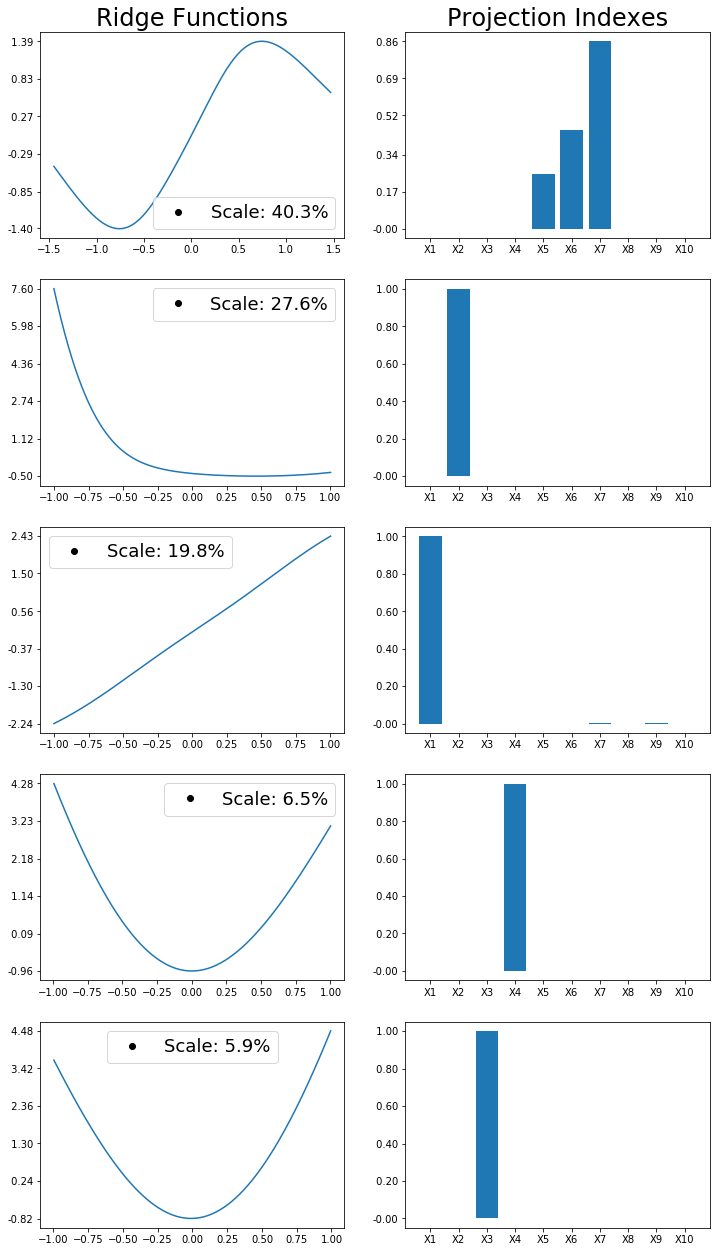

In [3]:
tf.random.set_seed(1)
np.random.seed(1)
model = SOSxNN(input_num=10, input_dummy_num=0, subnet_num=10, subnet_arch=[10, 6], task="Regression",
               activation_func=tf.tanh, batch_size=1000, training_epochs=5000, lr_bp=0.001, lr_cl=0.1,
               beta_threshold=0.01, tuning_epochs=0, l1_proj=0.001, l1_subnet = 0.01, smooth_lambda=10**(-5),
               verbose=True, val_ratio=0.2, early_stop_thres=500)
model.fit(train_x, train_y)
model.visualize("./", "test", train_x)

tr_pred = model.predict(model.tr_x) 
val_pred = model.predict(model.val_x) 
pred_test = model.predict(test_x)
sosxnn_mse_stat = np.hstack([np.round(np.mean((scaler_y.inverse_transform(tr_pred) - scaler_y.inverse_transform(model.tr_y))**2),5),\
                             np.round(np.mean((scaler_y.inverse_transform(val_pred) - scaler_y.inverse_transform(model.val_y))**2),5),\
                             np.round(np.mean((scaler_y.inverse_transform(pred_test) - scaler_y.inverse_transform(test_y))**2),5)])
print(sosxnn_mse_stat)

In [ ]:
tf.random.set_seed(1)
np.random.seed(1)
model = SOSxNN(input_num=10, input_dummy_num=0, subnet_num=10, subnet_arch=[10, 6], task="Regression",
               activation_func=tf.tanh, batch_size=1000, training_epochs=5000, lr_bp=0.001, lr_cl=0.1,
               beta_threshold=0.01, tuning_epochs=0, l1_proj=0.001, l1_subnet = 0.01, smooth_lambda=10**(-4),
               verbose=True, val_ratio=0.2, early_stop_thres=500)
model.fit(train_x, train_y)
model.visualize("./", "test", train_x)

tr_pred = model.predict(model.tr_x) 
val_pred = model.predict(model.val_x) 
pred_test = model.predict(test_x)
sosxnn_mse_stat = np.hstack([np.round(np.mean((scaler_y.inverse_transform(tr_pred) - scaler_y.inverse_transform(model.tr_y))**2),5),\
                             np.round(np.mean((scaler_y.inverse_transform(val_pred) - scaler_y.inverse_transform(model.val_y))**2),5),\
                             np.round(np.mean((scaler_y.inverse_transform(pred_test) - scaler_y.inverse_transform(test_y))**2),5)])
print(sosxnn_mse_stat)

Initial training.
Training epoch: 1, train loss: 0.06170, val loss: 0.06134
Training epoch: 2, train loss: 0.05215, val loss: 0.05046
Training epoch: 3, train loss: 0.04400, val loss: 0.04358
Training epoch: 4, train loss: 0.03982, val loss: 0.03917
Training epoch: 5, train loss: 0.03740, val loss: 0.03685
Training epoch: 6, train loss: 0.03247, val loss: 0.03200
Training epoch: 7, train loss: 0.03132, val loss: 0.03095
Training epoch: 8, train loss: 0.02966, val loss: 0.02916
Training epoch: 9, train loss: 0.02844, val loss: 0.02798
Training epoch: 10, train loss: 0.02705, val loss: 0.02688
Training epoch: 11, train loss: 0.02938, val loss: 0.02920
Training epoch: 12, train loss: 0.02370, val loss: 0.02357
Training epoch: 13, train loss: 0.02399, val loss: 0.02403
Training epoch: 14, train loss: 0.02217, val loss: 0.02214
Training epoch: 15, train loss: 0.02233, val loss: 0.02231
Training epoch: 16, train loss: 0.02205, val loss: 0.02205
Training epoch: 17, train loss: 0.02175, val lo

Training epoch: 140, train loss: 0.02001, val loss: 0.01987
Training epoch: 141, train loss: 0.01836, val loss: 0.01857
Training epoch: 142, train loss: 0.01740, val loss: 0.01739
Training epoch: 143, train loss: 0.01746, val loss: 0.01771
Training epoch: 144, train loss: 0.01835, val loss: 0.01838
Training epoch: 145, train loss: 0.02131, val loss: 0.02190
Training epoch: 146, train loss: 0.01958, val loss: 0.01926
Training epoch: 147, train loss: 0.01833, val loss: 0.01834
Training epoch: 148, train loss: 0.01771, val loss: 0.01757
Training epoch: 149, train loss: 0.01734, val loss: 0.01731
Training epoch: 150, train loss: 0.01756, val loss: 0.01766
Training epoch: 151, train loss: 0.01959, val loss: 0.01960
Training epoch: 152, train loss: 0.01845, val loss: 0.01832
Training epoch: 153, train loss: 0.01766, val loss: 0.01769
Training epoch: 154, train loss: 0.01723, val loss: 0.01721
Training epoch: 155, train loss: 0.01748, val loss: 0.01727
Training epoch: 156, train loss: 0.01783

Training epoch: 277, train loss: 0.01953, val loss: 0.01953
Training epoch: 278, train loss: 0.01700, val loss: 0.01701
Training epoch: 279, train loss: 0.01958, val loss: 0.02007
Training epoch: 280, train loss: 0.01866, val loss: 0.01871
Training epoch: 281, train loss: 0.01715, val loss: 0.01730
Training epoch: 282, train loss: 0.01660, val loss: 0.01667
Training epoch: 283, train loss: 0.01694, val loss: 0.01694
Training epoch: 284, train loss: 0.01800, val loss: 0.01835
Training epoch: 285, train loss: 0.02091, val loss: 0.02077
Training epoch: 286, train loss: 0.01897, val loss: 0.01887
Training epoch: 287, train loss: 0.01749, val loss: 0.01717
Training epoch: 288, train loss: 0.01838, val loss: 0.01833
Training epoch: 289, train loss: 0.01670, val loss: 0.01677
Training epoch: 290, train loss: 0.01736, val loss: 0.01737
Training epoch: 291, train loss: 0.01807, val loss: 0.01797
Training epoch: 292, train loss: 0.01787, val loss: 0.01834
Training epoch: 293, train loss: 0.01729

Training epoch: 414, train loss: 0.01714, val loss: 0.01722
Training epoch: 415, train loss: 0.01665, val loss: 0.01697


Initial training.
Training epoch: 1, train loss: 0.06137, val loss: 0.06088
Training epoch: 2, train loss: 0.04753, val loss: 0.04731
Training epoch: 3, train loss: 0.04208, val loss: 0.04122
Training epoch: 4, train loss: 0.04031, val loss: 0.03954
Training epoch: 5, train loss: 0.03597, val loss: 0.03514
Training epoch: 6, train loss: 0.03247, val loss: 0.03187
Training epoch: 7, train loss: 0.03047, val loss: 0.02990
Training epoch: 8, train loss: 0.03006, val loss: 0.02890
Training epoch: 9, train loss: 0.03512, val loss: 0.03617
Training epoch: 10, train loss: 0.02596, val loss: 0.02589
Training epoch: 11, train loss: 0.02954, val loss: 0.02935
Training epoch: 12, train loss: 0.02411, val loss: 0.02400
Training epoch: 13, train loss: 0.02643, val loss: 0.02618
Training epoch: 14, train loss: 0.02371, val loss: 0.02360
Training epoch: 15, train loss: 0.02213, val loss: 0.02212
Training epoch: 16, train loss: 0.02386, val loss: 0.02360
Training epoch: 17, train loss: 0.02322, val lo

Training epoch: 141, train loss: 0.02790, val loss: 0.02798
Training epoch: 142, train loss: 0.02007, val loss: 0.02042
Training epoch: 143, train loss: 0.01919, val loss: 0.01965
Training epoch: 144, train loss: 0.02413, val loss: 0.02423
Training epoch: 145, train loss: 0.01941, val loss: 0.01972
Training epoch: 146, train loss: 0.02868, val loss: 0.02863
Training epoch: 147, train loss: 0.05466, val loss: 0.05847
Training epoch: 148, train loss: 0.02871, val loss: 0.02922
Training epoch: 149, train loss: 0.02084, val loss: 0.02112
Training epoch: 150, train loss: 0.02062, val loss: 0.02107
Training epoch: 151, train loss: 0.01972, val loss: 0.01965
Training epoch: 152, train loss: 0.01871, val loss: 0.01878
Training epoch: 153, train loss: 0.01799, val loss: 0.01835
Training epoch: 154, train loss: 0.01740, val loss: 0.01772
Training epoch: 155, train loss: 0.01784, val loss: 0.01797
Training epoch: 156, train loss: 0.01885, val loss: 0.01894
Training epoch: 157, train loss: 0.01825

Training epoch: 278, train loss: 0.01791, val loss: 0.01830
Training epoch: 279, train loss: 0.01769, val loss: 0.01807
Training epoch: 280, train loss: 0.01748, val loss: 0.01781
Training epoch: 281, train loss: 0.01967, val loss: 0.01971
Training epoch: 282, train loss: 0.01766, val loss: 0.01828
Training epoch: 283, train loss: 0.01939, val loss: 0.01931
Training epoch: 284, train loss: 0.01914, val loss: 0.01958
Training epoch: 285, train loss: 0.01736, val loss: 0.01795
Training epoch: 286, train loss: 0.01813, val loss: 0.01862
Training epoch: 287, train loss: 0.03491, val loss: 0.03530
Training epoch: 288, train loss: 0.02141, val loss: 0.02191
Training epoch: 289, train loss: 0.02283, val loss: 0.02236
Training epoch: 290, train loss: 0.02020, val loss: 0.02071
Training epoch: 291, train loss: 0.02335, val loss: 0.02342
Training epoch: 292, train loss: 0.01858, val loss: 0.01868
Training epoch: 293, train loss: 0.02229, val loss: 0.02288
Training epoch: 294, train loss: 0.01860

Training epoch: 415, train loss: 0.01922, val loss: 0.01953
Training epoch: 416, train loss: 0.02007, val loss: 0.02059
Training epoch: 417, train loss: 0.01738, val loss: 0.01795
Training epoch: 418, train loss: 0.01743, val loss: 0.01780
Training epoch: 419, train loss: 0.02442, val loss: 0.02450
Training epoch: 420, train loss: 0.03895, val loss: 0.03839
Training epoch: 421, train loss: 0.01886, val loss: 0.01966
Training epoch: 422, train loss: 0.01976, val loss: 0.02086
Training epoch: 423, train loss: 0.02306, val loss: 0.02356
Training epoch: 424, train loss: 0.02841, val loss: 0.02869
Training epoch: 425, train loss: 0.01830, val loss: 0.01890
Training epoch: 426, train loss: 0.01667, val loss: 0.01703
Training epoch: 427, train loss: 0.01860, val loss: 0.01885
Training epoch: 428, train loss: 0.01702, val loss: 0.01753
Training epoch: 429, train loss: 0.02052, val loss: 0.02049
Training epoch: 430, train loss: 0.01886, val loss: 0.01925
Training epoch: 431, train loss: 0.01861

Training epoch: 552, train loss: 0.02428, val loss: 0.02441
Training epoch: 553, train loss: 0.01887, val loss: 0.01911
Training epoch: 554, train loss: 0.02307, val loss: 0.02393
Training epoch: 555, train loss: 0.01747, val loss: 0.01845
Training epoch: 556, train loss: 0.02198, val loss: 0.02195
Training epoch: 557, train loss: 0.01899, val loss: 0.01928
Training epoch: 558, train loss: 0.01883, val loss: 0.01897
Training epoch: 559, train loss: 0.02778, val loss: 0.02832
Training epoch: 560, train loss: 0.02563, val loss: 0.02611
Training epoch: 561, train loss: 0.01718, val loss: 0.01762
Training epoch: 562, train loss: 0.01748, val loss: 0.01844
Training epoch: 563, train loss: 0.01835, val loss: 0.01872
Training epoch: 564, train loss: 0.01729, val loss: 0.01809
Training epoch: 565, train loss: 0.01755, val loss: 0.01770
Training epoch: 566, train loss: 0.03667, val loss: 0.03751
Training epoch: 567, train loss: 0.02348, val loss: 0.02382
Training epoch: 568, train loss: 0.01982

Training epoch: 689, train loss: 0.01750, val loss: 0.01787
Training epoch: 690, train loss: 0.01937, val loss: 0.01960
Training epoch: 691, train loss: 0.01658, val loss: 0.01691
Training epoch: 692, train loss: 0.01664, val loss: 0.01722
Training epoch: 693, train loss: 0.02590, val loss: 0.02766
Training epoch: 694, train loss: 0.01766, val loss: 0.01813
Training epoch: 695, train loss: 0.02159, val loss: 0.02196
Training epoch: 696, train loss: 0.01900, val loss: 0.01972
Training epoch: 697, train loss: 0.01793, val loss: 0.01823
Training epoch: 698, train loss: 0.01770, val loss: 0.01783
Training epoch: 699, train loss: 0.02029, val loss: 0.02090
Training epoch: 700, train loss: 0.02427, val loss: 0.02522
Training epoch: 701, train loss: 0.02029, val loss: 0.02077
Training epoch: 702, train loss: 0.01765, val loss: 0.01840
Training epoch: 703, train loss: 0.01650, val loss: 0.01666
Training epoch: 704, train loss: 0.01868, val loss: 0.01883
Training epoch: 705, train loss: 0.02608

Training epoch: 826, train loss: 0.02762, val loss: 0.02912
Training epoch: 827, train loss: 0.02978, val loss: 0.03000
Training epoch: 828, train loss: 0.01737, val loss: 0.01761
Training epoch: 829, train loss: 0.03235, val loss: 0.03272
Training epoch: 830, train loss: 0.02040, val loss: 0.02076
Training epoch: 831, train loss: 0.02745, val loss: 0.02857
Training epoch: 832, train loss: 0.01767, val loss: 0.01787
Training epoch: 833, train loss: 0.01836, val loss: 0.01893
Training epoch: 834, train loss: 0.01701, val loss: 0.01774
Training epoch: 835, train loss: 0.02267, val loss: 0.02275
Training epoch: 836, train loss: 0.02090, val loss: 0.02145
Training epoch: 837, train loss: 0.01667, val loss: 0.01716
Training epoch: 838, train loss: 0.01676, val loss: 0.01712
Training epoch: 839, train loss: 0.02162, val loss: 0.02211
Training epoch: 840, train loss: 0.01961, val loss: 0.02135
Training epoch: 841, train loss: 0.01763, val loss: 0.01894
Training epoch: 842, train loss: 0.01852

Training epoch: 963, train loss: 0.01820, val loss: 0.01830
Training epoch: 964, train loss: 0.01691, val loss: 0.01762
Training epoch: 965, train loss: 0.02187, val loss: 0.02273
Training epoch: 966, train loss: 0.02191, val loss: 0.02201
Training epoch: 967, train loss: 0.01923, val loss: 0.01983
Training epoch: 968, train loss: 0.01985, val loss: 0.01994
Training epoch: 969, train loss: 0.01736, val loss: 0.01767
Training epoch: 970, train loss: 0.01719, val loss: 0.01733
Training epoch: 971, train loss: 0.01922, val loss: 0.01951
Training epoch: 972, train loss: 0.01605, val loss: 0.01653
Training epoch: 973, train loss: 0.02300, val loss: 0.02392
Training epoch: 974, train loss: 0.02307, val loss: 0.02412
Training epoch: 975, train loss: 0.02173, val loss: 0.02271
Training epoch: 976, train loss: 0.01880, val loss: 0.01999
Training epoch: 977, train loss: 0.01828, val loss: 0.01938
Training epoch: 978, train loss: 0.01807, val loss: 0.01936
Training epoch: 979, train loss: 0.01860

Training epoch: 1098, train loss: 0.01650, val loss: 0.01650
Training epoch: 1099, train loss: 0.01758, val loss: 0.01796
Training epoch: 1100, train loss: 0.01805, val loss: 0.01864
Training epoch: 1101, train loss: 0.02799, val loss: 0.02797
Training epoch: 1102, train loss: 0.01625, val loss: 0.01672
Training epoch: 1103, train loss: 0.01870, val loss: 0.01891
Training epoch: 1104, train loss: 0.01774, val loss: 0.01799
Training epoch: 1105, train loss: 0.01741, val loss: 0.01792
Training epoch: 1106, train loss: 0.03790, val loss: 0.03884
Training epoch: 1107, train loss: 0.02331, val loss: 0.02332
Training epoch: 1108, train loss: 0.01722, val loss: 0.01834
Training epoch: 1109, train loss: 0.02208, val loss: 0.02261
Training epoch: 1110, train loss: 0.01665, val loss: 0.01689
Training epoch: 1111, train loss: 0.01737, val loss: 0.01776
Training epoch: 1112, train loss: 0.02065, val loss: 0.02096
Training epoch: 1113, train loss: 0.01973, val loss: 0.01977
Training epoch: 1114, tr

Training epoch: 1233, train loss: 0.01734, val loss: 0.01754
Training epoch: 1234, train loss: 0.01814, val loss: 0.01847
Training epoch: 1235, train loss: 0.01626, val loss: 0.01651
Training epoch: 1236, train loss: 0.01626, val loss: 0.01643
Training epoch: 1237, train loss: 0.01627, val loss: 0.01665
Training epoch: 1238, train loss: 0.01832, val loss: 0.01856
Training epoch: 1239, train loss: 0.01904, val loss: 0.01970
Training epoch: 1240, train loss: 0.01789, val loss: 0.01859
Training epoch: 1241, train loss: 0.01745, val loss: 0.01750
Training epoch: 1242, train loss: 0.01830, val loss: 0.01843
Training epoch: 1243, train loss: 0.01908, val loss: 0.01926
Training epoch: 1244, train loss: 0.01951, val loss: 0.02023
Training epoch: 1245, train loss: 0.01839, val loss: 0.01855
Training epoch: 1246, train loss: 0.01988, val loss: 0.02062
Training epoch: 1247, train loss: 0.01709, val loss: 0.01726
Training epoch: 1248, train loss: 0.03289, val loss: 0.03254
Training epoch: 1249, tr

Training epoch: 1368, train loss: 0.01775, val loss: 0.01793
Training epoch: 1369, train loss: 0.01880, val loss: 0.01898
Training epoch: 1370, train loss: 0.01851, val loss: 0.01879
Training epoch: 1371, train loss: 0.01928, val loss: 0.01973
Training epoch: 1372, train loss: 0.04686, val loss: 0.04760
Training epoch: 1373, train loss: 0.01660, val loss: 0.01741
Training epoch: 1374, train loss: 0.01671, val loss: 0.01695
Training epoch: 1375, train loss: 0.01643, val loss: 0.01697
Training epoch: 1376, train loss: 0.01638, val loss: 0.01650
Training epoch: 1377, train loss: 0.01581, val loss: 0.01615
Training epoch: 1378, train loss: 0.01847, val loss: 0.01873
Training epoch: 1379, train loss: 0.01922, val loss: 0.01934
Training epoch: 1380, train loss: 0.01657, val loss: 0.01688
Training epoch: 1381, train loss: 0.01597, val loss: 0.01638
Training epoch: 1382, train loss: 0.01660, val loss: 0.01692
Training epoch: 1383, train loss: 0.01612, val loss: 0.01654
Training epoch: 1384, tr

Training epoch: 1503, train loss: 0.01700, val loss: 0.01725
Training epoch: 1504, train loss: 0.01686, val loss: 0.01716
Training epoch: 1505, train loss: 0.01725, val loss: 0.01748
Training epoch: 1506, train loss: 0.01741, val loss: 0.01850
Training epoch: 1507, train loss: 0.01686, val loss: 0.01729
Training epoch: 1508, train loss: 0.01793, val loss: 0.01810
Training epoch: 1509, train loss: 0.01607, val loss: 0.01633
Training epoch: 1510, train loss: 0.01760, val loss: 0.01798
Training epoch: 1511, train loss: 0.02843, val loss: 0.02910
Training epoch: 1512, train loss: 0.01697, val loss: 0.01723
Training epoch: 1513, train loss: 0.01627, val loss: 0.01637
Training epoch: 1514, train loss: 0.01870, val loss: 0.01879
Training epoch: 1515, train loss: 0.01618, val loss: 0.01675
Training epoch: 1516, train loss: 0.01949, val loss: 0.01981
Training epoch: 1517, train loss: 0.01945, val loss: 0.01998
Training epoch: 1518, train loss: 0.01863, val loss: 0.01879
Training epoch: 1519, tr

Training epoch: 1638, train loss: 0.01708, val loss: 0.01737
Training epoch: 1639, train loss: 0.02030, val loss: 0.02054
Training epoch: 1640, train loss: 0.01945, val loss: 0.01965
Training epoch: 1641, train loss: 0.01703, val loss: 0.01726
Training epoch: 1642, train loss: 0.01637, val loss: 0.01668
Training epoch: 1643, train loss: 0.01571, val loss: 0.01596
Training epoch: 1644, train loss: 0.01662, val loss: 0.01673
Training epoch: 1645, train loss: 0.01735, val loss: 0.01735
Training epoch: 1646, train loss: 0.01848, val loss: 0.01860
Training epoch: 1647, train loss: 0.03226, val loss: 0.03278
Training epoch: 1648, train loss: 0.02068, val loss: 0.02074
Training epoch: 1649, train loss: 0.02125, val loss: 0.02166
Training epoch: 1650, train loss: 0.01748, val loss: 0.01765
Training epoch: 1651, train loss: 0.02248, val loss: 0.02266
Training epoch: 1652, train loss: 0.01769, val loss: 0.01781
Training epoch: 1653, train loss: 0.01710, val loss: 0.01724
Training epoch: 1654, tr

Training epoch: 1773, train loss: 0.01816, val loss: 0.01842
Training epoch: 1774, train loss: 0.01665, val loss: 0.01694
Training epoch: 1775, train loss: 0.01615, val loss: 0.01633
Training epoch: 1776, train loss: 0.01620, val loss: 0.01643
Training epoch: 1777, train loss: 0.01588, val loss: 0.01622
Training epoch: 1778, train loss: 0.02513, val loss: 0.02573
Training epoch: 1779, train loss: 0.02541, val loss: 0.02576
Training epoch: 1780, train loss: 0.01767, val loss: 0.01796
Training epoch: 1781, train loss: 0.01633, val loss: 0.01651
Training epoch: 1782, train loss: 0.01748, val loss: 0.01770
Training epoch: 1783, train loss: 0.02037, val loss: 0.02030
Training epoch: 1784, train loss: 0.02100, val loss: 0.02120
Training epoch: 1785, train loss: 0.01904, val loss: 0.01900
Training epoch: 1786, train loss: 0.01851, val loss: 0.01913
Training epoch: 1787, train loss: 0.02242, val loss: 0.02379
Training epoch: 1788, train loss: 0.02996, val loss: 0.03055
Training epoch: 1789, tr

Training epoch: 1908, train loss: 0.02399, val loss: 0.02419
Training epoch: 1909, train loss: 0.01632, val loss: 0.01643
Training epoch: 1910, train loss: 0.01839, val loss: 0.01892
Training epoch: 1911, train loss: 0.02130, val loss: 0.02243
Training epoch: 1912, train loss: 0.03089, val loss: 0.03065
Training epoch: 1913, train loss: 0.01572, val loss: 0.01614
Training epoch: 1914, train loss: 0.02398, val loss: 0.02390
Training epoch: 1915, train loss: 0.01717, val loss: 0.01722
Training epoch: 1916, train loss: 0.04225, val loss: 0.04167
Training epoch: 1917, train loss: 0.02429, val loss: 0.02453
Training epoch: 1918, train loss: 0.01715, val loss: 0.01740
Training epoch: 1919, train loss: 0.02095, val loss: 0.02173
Training epoch: 1920, train loss: 0.01628, val loss: 0.01676
Training epoch: 1921, train loss: 0.01685, val loss: 0.01691
Training epoch: 1922, train loss: 0.01874, val loss: 0.01899
Training epoch: 1923, train loss: 0.01896, val loss: 0.01952
Training epoch: 1924, tr

Training epoch: 2043, train loss: 0.01632, val loss: 0.01641
Training epoch: 2044, train loss: 0.01702, val loss: 0.01716
Training epoch: 2045, train loss: 0.02457, val loss: 0.02485
Training epoch: 2046, train loss: 0.01662, val loss: 0.01688
Training epoch: 2047, train loss: 0.01790, val loss: 0.01834
Training epoch: 2048, train loss: 0.01836, val loss: 0.01847
Training epoch: 2049, train loss: 0.01620, val loss: 0.01672
Training epoch: 2050, train loss: 0.02074, val loss: 0.02176
Training epoch: 2051, train loss: 0.02940, val loss: 0.03101
Training epoch: 2052, train loss: 0.01640, val loss: 0.01651
Training epoch: 2053, train loss: 0.01615, val loss: 0.01659
Training epoch: 2054, train loss: 0.01781, val loss: 0.01813
Training epoch: 2055, train loss: 0.01664, val loss: 0.01683
Training epoch: 2056, train loss: 0.01554, val loss: 0.01597
Training epoch: 2057, train loss: 0.01605, val loss: 0.01604
Training epoch: 2058, train loss: 0.02088, val loss: 0.02104
Training epoch: 2059, tr

Training epoch: 2178, train loss: 0.01550, val loss: 0.01573
Training epoch: 2179, train loss: 0.01866, val loss: 0.01850
Training epoch: 2180, train loss: 0.01725, val loss: 0.01757
Training epoch: 2181, train loss: 0.02279, val loss: 0.02374
Training epoch: 2182, train loss: 0.01898, val loss: 0.01913
Training epoch: 2183, train loss: 0.01588, val loss: 0.01610
Training epoch: 2184, train loss: 0.01899, val loss: 0.01919
Training epoch: 2185, train loss: 0.01597, val loss: 0.01621
Training epoch: 2186, train loss: 0.01710, val loss: 0.01724
Training epoch: 2187, train loss: 0.02246, val loss: 0.02255
Training epoch: 2188, train loss: 0.02112, val loss: 0.02094
Training epoch: 2189, train loss: 0.01729, val loss: 0.01725
Training epoch: 2190, train loss: 0.02210, val loss: 0.02176
Training epoch: 2191, train loss: 0.01716, val loss: 0.01814
Training epoch: 2192, train loss: 0.01727, val loss: 0.01776
Training epoch: 2193, train loss: 0.01617, val loss: 0.01659
Training epoch: 2194, tr

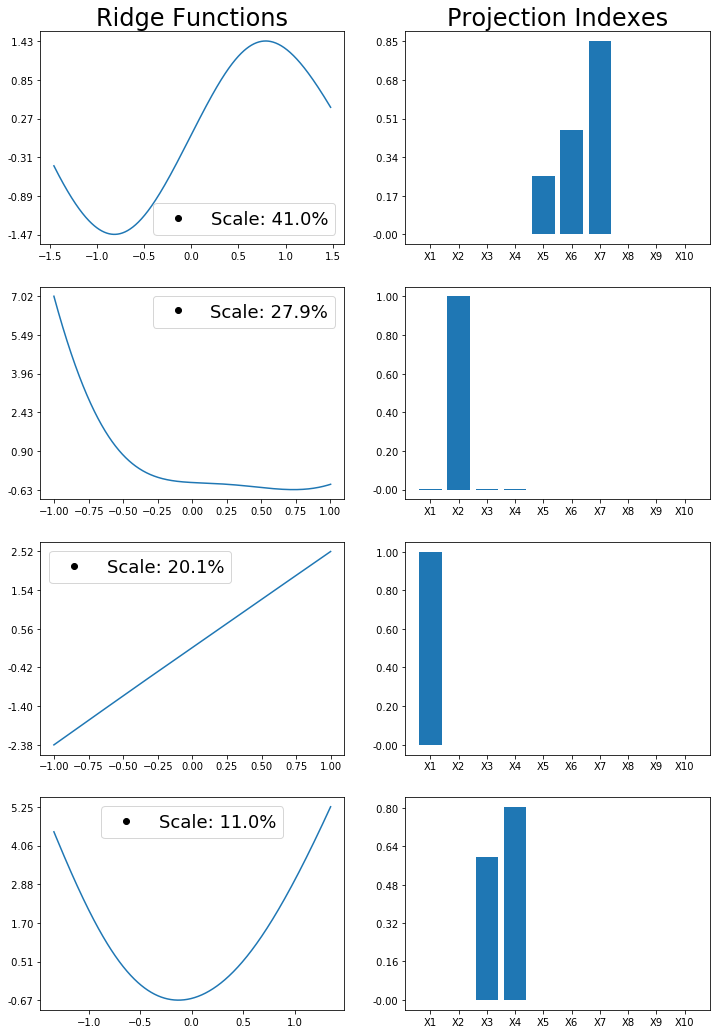

In [5]:
tf.random.set_seed(1)
np.random.seed(1)
model = SOSxNN(input_num=10, input_dummy_num=0, subnet_num=10, subnet_arch=[10, 6], task="Regression",
               activation_func=tf.tanh, batch_size=1000, training_epochs=5000, lr_bp=0.001, lr_cl=0.1,
               beta_threshold=0.01, tuning_epochs=100, l1_proj=0.001, l1_subnet = 0.01, smooth_lambda=10**(-3),
               verbose=True, val_ratio=0.2, early_stop_thres=500)
model.fit(train_x, train_y)
model.visualize("./", "test", train_x)

tr_pred = model.predict(model.tr_x) 
val_pred = model.predict(model.val_x) 
pred_test = model.predict(test_x)

sosxnn_mse_stat = np.hstack([np.round(np.mean((scaler_y.inverse_transform(tr_pred) - scaler_y.inverse_transform(model.tr_y))**2),5),\
                             np.round(np.mean((scaler_y.inverse_transform(val_pred) - scaler_y.inverse_transform(model.val_y))**2),5),\
               np.round(np.mean((scaler_y.inverse_transform(pred_test) - scaler_y.inverse_transform(test_y))**2),5)])
print(sosxnn_mse_stat)